In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from drilling_opt import well_info_class 
from drilling_opt import test_file_reading

In [4]:
def main_realtime(filename,file_type,motor_make=None,bit_diameter=6.5,torque_slope=None,const_PRM_motor=None):
    mywell = well_info_class.well_info('H')
    mywell.get_motor_info(motor_make,bit_diameter,torque_slope,const_PRM_motor)
    #mywell.add_pull_info([],['bad','good','bad'])
    mywell.read_local_data(filename,file_type)
    columns = list(mywell.DataFrame_raw.columns.values)
    col_select = 'DEPT'
    threshold_conditions = [['ROP','>=',5],['RPM','>=',10],['DIFP','>=',10],['OBR','>',0],['TPO','>=',50],['WOB','>=',1]]
    mywell.curation_realtime_data(col_select,columns,threshold_conditions=threshold_conditions,id_mono=True,id_mean=True,id_fill=True)
    mywell.Metrics_Calculation()
    mywell.Media_filter(['Wear_factor','MSE','Bit_agg','ROP'],15)
    return mywell
def main_local(filename,file_type,motor_make='Phoenix',bit_diameter=8.75,torque_slope=None,const_PRM_motor=None):
    mywell = well_info_class.well_info('H')
    mywell.get_motor_info(motor_make,bit_diameter,torque_slope,const_PRM_motor)
    mywell.add_formation_info(formation_depth=[7368,8743,9768,11346])
    mywell.read_local_clean_data(filename,file_type)
    mywell.Metrics_Calculation()
    mywell.Media_filter(['Wear_factor','MSE','Bit_agg','ROP'],15)
    mywell.get_peak_value_formation('Wear_factor_medfil')
    return mywell


In [11]:

mywell1 = main_realtime('1478090851.las','las','COBRA',6.5)
#mywell2 = main('1478090851.las','las',None,6.5,7.6,0.35)
#mywell1.add_pull_info([],[])
well2 = main_local('2003HDepth.csv','csv')
#mywell1.DataFrame_metrics.head() 
#well2.DataFrame_metrics.head()
#well2.get_motor_info()
#well2.add_pull_info(pull_depth=[8285,9963],status=['good','bad'])
#well2.add_pull_info(pull_depth=[8285,9963],status=['good','bad'])
#well2.add_formation_info(formation_depth=[7368,8743,9768,11346])
#well2.read_local_clean_data('2003HDepth.csv','csv')
#mywell2.DataFrame_metrics.to_csv('metrics_medfil_12_30_2016.csv',index=False)

initiation for well: Haimo
COBRA
9.256637168141593 0.29
 #curation: initial length  92538
df_old is empty
 #curation: final length 9229
compared with old 9229 0
filter new data
filter new data
filter new data
filter new data
media_filter
initiation for well: Haimo
Phoenix
9.9375 0.521
[7368, 8743, 9768, 11346]
compared with old 0 6265
media_filter
Haimo
[[], [], [], []]
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
peak has been selected


In [6]:
from bokeh.plotting import figure, output_file, show,hplot,gridplot
from bokeh.io import output_notebook

In [7]:
pull_depth = [5434,9104,9511]
status = ['good','good','good']
#formation_depth = [4000,6000]
mywell1.add_pull_info(pull_depth=pull_depth,status=status)
#mywell1.add_formation_info(formation_depth=formation_depth)

[5434, 9104, 9511]


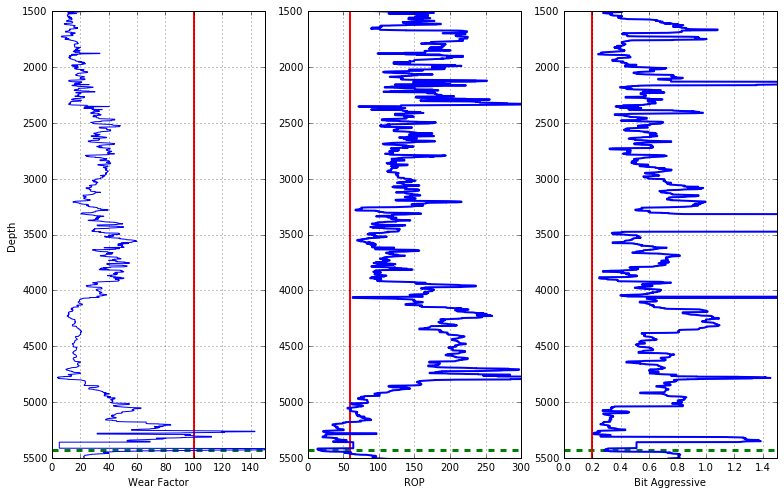

In [10]:
#fig = plt.figure(figsize=(6,10),dpi=600)
depth0 = 1500
depth1 =5500
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(13,8),dpi=600)
#ax1=fig.add_subplot(121)
mywell1.plot_pull_depth(ax1)
ax1.plot([100,100],[0,6000],'r',linewidth=2)
ax1.plot([100,80],[6000,6000],'r',linewidth=2)
ax1.plot([80,80],[6000,10000],'r',linewidth=2)
ax1.plot(mywell1.DataFrame_metrics['Wear_factor_medfil'],mywell1.DataFrame_metrics['Depth'],'',linewidth=1)
ax1.grid()
ax1.set_xlim([0, 150])
ax1.set_ylim([depth0, depth1])
ax1.invert_yaxis()

ax1.set_xlabel('Wear Factor')
ax1.set_ylabel('Depth')


# second plot 
mywell1.plot_pull_depth(ax2)
ax2.plot([60,60],[0,10000],'r',linewidth=2)
ax2.plot(mywell1.DataFrame_metrics['ROP_medfil'],mywell1.DataFrame_metrics['Depth'],'',linewidth=2)

ax2.grid()
ax2.set_xlim([0, 300])
ax2.set_ylim([depth0, depth1])
ax2.invert_yaxis()
ax2.set_xlabel('ROP')
# third plot
mywell1.plot_pull_depth(ax3)
ax3.plot([0.2,0.2],[0,10000],'r',linewidth=2)
ax3.plot(mywell1.DataFrame_metrics['Bit_agg_medfil'],mywell1.DataFrame_metrics['Depth'],'',linewidth=2)
ax3.grid()
ax3.set_xlim([0, 1.5])
ax3.set_ylim([depth0, depth1])
ax3.invert_yaxis()
ax3.set_xlabel('Bit Aggressive')
#mywell1.plot_formation_depth(ax1)
#plt.plot(mywell1.DataFrame_metrics['Wear_factor_medfil'],mywell1.DataFrame_metrics['Depth'],'',linewidth=2)
#plt.plot(mywell2.DataFrame_metrics['Bit_agg_medfil']*40+100,mywell2.DataFrame_metrics['Depth'],'g-',linewidth=2)
#plt.xlim([0,200])
#plt.ylim([depth1,depth2])


#plt.gca().invert_yaxis()
#plt.tight_layout()


In [51]:
#p = figure(plot_width=400, plot_height=400)
#title = 'comparison between default motor and correct motor info'


depth1 = 8500
depth2 = 9900
pull_depth = [5434,9104,9511]

y1 = 10000
y0 = 0
plot_width = 200
plot_height = 500
tools = "save,box_zoom"
# plot 1
p1 = figure(title='Wear Factor',tools = tools ,plot_width=plot_width, plot_height=plot_height,y_range=(y1,y0),x_range=(0,200))
for depth in pull_depth:
    p1.line([0,200],[depth,depth],line_color='green',line_width=4)
p1.line([100,100],[0,4045],line_color='black',line_width=3)   
p1.line([100,80,80],[4050,4045,10000],line_color='black',line_width=3)   
p1.line(mywell1.DataFrame_metrics['Wear_factor_medfil'],mywell1.DataFrame_metrics['Depth'],
       legend='WF(default motor)',line_color='blue',line_width=1)
p1.line(mywell2.DataFrame_metrics['Wear_factor_medfil'],mywell2.DataFrame_metrics['Depth'],
       legend='WF(correct motor)',line_color='red',line_width=1)
p1.xaxis.axis_label_text_font_size = "400pt"
#plot 2 
p2 = figure(title = 'ROP',tools=tools,plot_width=plot_width, plot_height=plot_height,y_range=(y1,y0),x_range=(0,200))
for depth in pull_depth:
    p2.line([0,200],[depth,depth],line_color='green',line_width=4)
p2.line([60,60],[0,10000],line_color='black',line_width=3)   
#p2.line([100,80,80],[4050,4045,10000],line_color='black',line_width=3)    
p2.line(mywell1.DataFrame_metrics['ROP_medfil'],mywell1.DataFrame_metrics['Depth'],
       legend='ROP',line_color='blue',line_width=1)
#p2.line(mywell2.DataFrame_metrics['Wear_factor_medfil'],mywell2.DataFrame_metrics['Depth'],
       #legend='Wear factor(correct motor info)',line_color='red',line_width=2)
p2.xaxis.axis_label_text_font_size = "40pt"
#plot 3 
p3 = figure(title = 'bit agg',tools=tools,plot_width=plot_width, plot_height=plot_height,y_range=(y1,y0),x_range=(0,2))
for depth in pull_depth:
    p3.line([0,5],[depth,depth],line_color='green',line_width=4)
#p3.line([100,100],[0,4045],line_color='black',line_width=3)   
#p3.line([100,80,80],[4050,4045,10000],line_color='black',line_width=3)    
p3.line(mywell1.DataFrame_metrics['Bit_agg_medfil'],mywell1.DataFrame_metrics['Depth'],
       legend='Agg(default motor)',line_color='blue',line_width=1)
p3.line(mywell2.DataFrame_metrics['Bit_agg_medfil'],mywell2.DataFrame_metrics['Depth'],
       legend='Agg(correct motor)',line_color='red',line_width=1)
p3.xaxis.axis_label_text_font_size = "400pt"

p = gridplot([[p1,p2,p3]])

#p3.yaxis.axis_label_text_font_size = '20pt'

#output_file("post_analysis_112_29_16.html")
output_notebook()
show(p)
#plt.xlim([0,200])
#plt.ylim([depth1,depth2])
#plt.gca().invert_yaxis()
#plt.tight_layout()
#plt.grid()

#fig = plt.figure(figsize=(6,10),dpi=600)
#ax1=fig.add_subplot(111)
#plt.plot(mywell1.DataFrame_metrics['Bit_agg_medfil']*40+100,mywell1.DataFrame_metrics['Depth'],'',linewidth=2)
#plt.plot(mywell2.DataFrame_metrics['Bit_agg_medfil']*40+100,mywell2.DataFrame_metrics['Depth'],'g-',linewidth=2)
#plt.xlim([0,200])
#plt.ylim([depth1,depth2])
#plt.gca().invert_yaxis()
#plt.tight_layout()
#plt.grid()


NameError: name 'mywell2' is not defined

In [81]:
#depth = 
from datetime import datetime
ts= pd.DataFrame()
ts['depth'] = pd.Series(mywell1.DataFrame_metrics['Depth'])
ts.loc[:,'depth']=ts['depth'].astype(int) + 1000
ts['depth_new']=pd.to_datetime(ts['depth'],format='%Y')
ts['data'] = pd.Series(mywell1.DataFrame_metrics['Wear_factor'])
rolmean = ts['data'].rolling(window=12).mean()
rolstd = ts['data'].rolling(window=12).std()


fig = plt.figure(figsize=(15,6),dpi=600)
ax1=fig.add_subplot(111)
#orig = plt.plot(ts['depth'],ts['data'], color='blue',label='Original')
mean = plt.plot(ts['depth'],rolmean, color='red', label='Rolling Mean')
std = plt.plot(ts['depth'],rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#print(rolmean)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1283-01-01 00:00:00

In [63]:

\

[[  283.           284.           285.         ...,  9509.          9510.
   9511.        ]
 [   27.20661973    41.26326957    43.58138441 ...,   172.87790999
    155.63782362   166.61685333]]


In [65]:
ts_log = np.log(ts)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.plot(trend, label='Trend')

ValueError: You must specify a freq or x must be a pandas object with a timeseries index

In [ ]:
import pandas as pd
def get_motor_info(motor_make='Phoenix',bit_diameter=8.75):
    if motor_make == 'Phoenix':  
        motor_info_df = pd.read_excel('motor_data',sheetname='Phoenix') 
        
        
        if bit_diameter ==8.75: ## P71
            torque_slope = 13720.0/1280
            const_RPM_motor =  0.242 
        elif bit_diameter == 6.125: ##46
            torque_slope =  4450.0/860
            const_RPM_motor = 0.521
        else:   
            
            torque_slope,const_PRM_motor = error_bit_diameter() 
            
    elif motor_make == 'COBRA':
        if bit_diameter == 6.5:
            torque_slope = 10460.0/1130.0
            const_RPM_motor = 0.29
        else:
            torque_slope,const_PRM_motor = error_bit_diameter()
    else:
        
        torque_slope,const_PRM_motor = error_motor_make() 
            
    return torque_slope, const_RPM_motor

In [42]:
def get_motor_info_from_file(motor_make='Phoenix',bit_diameter=8.75,torque_slope=None,const_RPM_motor=None):
    
    '''
    torque_slope is the torque ratio unit is ft/lbs/ psi
    const_RPM_motor is the speed ratio, unit is rev/gal
    '''
    if motor_make == None: # don't use the database
        return torque_slope,const_RPM_motor
    else:
        motor_info_df = pd.read_excel('./drilling_opt/motor_data.xlsx',sheetname=motor_make) 
        search_result = motor_info_df[motor_info_df['bit_diameter']==bit_diameter]
    
        if len(search_result)!=0: # find the element
            if torque_slope == None:
                torque_slope = float(search_result['torque_slope'])
            if const_RPM_motor == None:
                const_RPM_motor = float(search_result['const_RPM_motor'])
        else:
            print('not in the database')
            torque_slope=-1
            const_RPM_motor=-1
        print(torque_slope,const_RPM_motor)
        return torque_slope,const_RPM_motor
    
get_motor_info_from_file(motor_make=None,bit_diameter=6.5,torque_slope=7.6,const_RPM_motor=0.35)

(7.6, 0.35)